# imports 

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import eptstgcn

In [5]:
class Loader(eptstgcn.DatasetLoader):
    def __init__(self,data_dict):
         self._dataset = data_dict 

# data 

In [6]:
N = 44 # number of nodes
t = np.linspace(0,1,500)
T = len(t)

In [7]:
underlying = np.sin(8*np.pi*t) + np.cos(4*np.pi*t) 
FX = [underlying + np.random.randn(T) for i in range(N-2)]
FX.append(np.random.randn(T))
FX.append(np.random.randn(T))

In [8]:
FX = np.stack(FX,axis=1).tolist()

In [9]:
W = np.eye(N)
W[:(N-2),:(N-2)] = 1 
W2 = np.eye(N)

In [18]:
data_dict1={
    'edges':[[i,j] for i in range(N) for j in range(N)], 
    'node_ids': {'node{}'.format(i+1): i for i in range(N)}, 
    'weights':W.reshape(-1).tolist(),
    'FX':FX
}
data_dict2={
    'edges':[[i,j] for i in range(N) for j in range(N)], 
    'node_ids': {'node{}'.format(i+1): i for i in range(N)}, 
    'weights':W2.reshape(-1).tolist(), 
    'FX':FX
}

# loader -> learn

In [22]:
dataset1 = Loader(data_dict1).get_dataset(lags=4)
dataset2 = Loader(data_dict2).get_dataset(lags=4)
train_dataset1, test_dataset1 = eptstgcn.utils.temporal_signal_split(dataset1, train_ratio = 0.9)
train_dataset2, test_dataset2 = eptstgcn.utils.temporal_signal_split(dataset2, train_ratio = 0.9)
lrnr1 = eptstgcn.WeightedLossStgcnLeaner(train_dataset1, dataset_name = 'ver1')
lrnr2 = eptstgcn.WeightedLossStgcnLeaner(train_dataset2, dataset_name = 'ver1')
lrnr1.learn(W,filters=4, epoch=50)
lrnr2.learn(W2,filters=4, epoch=50)

# plot

In [23]:
evaltor1 = eptstgcn.utils.Evaluator(lrnr1,train_dataset1,test_dataset1)
evaltor2 = eptstgcn.utils.Evaluator(lrnr2,train_dataset2,test_dataset2)

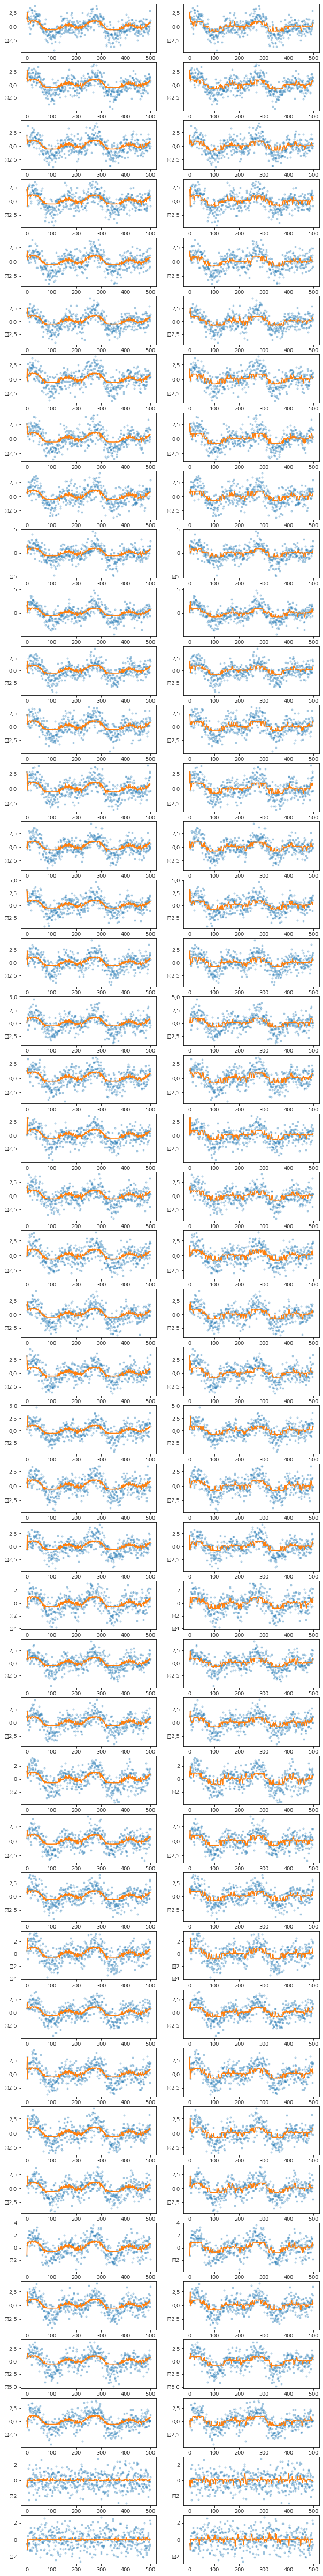

In [24]:
fig,axes = plt.subplots(N,2,figsize=(10,N*2))
for i,ax in enumerate(axes): 
    ax[0].plot(evaltor1.f[:,i],'.',alpha=0.3)
    ax[1].plot(evaltor2.f[:,i],'.',alpha=0.3)
    ax[0].plot(evaltor1.fhat[:,i],'-')
    ax[1].plot(evaltor2.fhat[:,i],'-')

- 왼쪽: 정상 가중치
- 오른쪽: 비정상 가중치 